In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [32]:
filepath_1 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_effect.csv'
CRISPR_gene_effect = pd.read_csv(filepath_1)

filepath_2 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_dependency.csv'
CRISPR_gene_dependency = pd.read_csv(filepath_2)

filepath_3 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_expression.csv'
CCLE_expression = pd.read_csv(filepath_3)

filepath_4 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/sample_info.csv'
sample_info = pd.read_csv(filepath_4)

In [33]:
sample_info = sample_info[['DepMap_ID', 'sex', 'sample_collection_site', 'primary_disease', 'Subtype', 'age', 'lineage', 'lineage_subtype',
                           'lineage_sub_subtype','Cellosaurus_NCIt_disease']]

# Define values to exclude
values_to_exclude = ['Adrenal Cancer', 'Teratoma', 'Embryonal Cancer', 'Unknown']

In [34]:
CRISPR_gene_effect_master_df = pd.merge(sample_info, CRISPR_gene_effect, on="DepMap_ID", how="outer")
CRISPR_gene_dependency_master_df = pd.merge(sample_info, CRISPR_gene_dependency, on="DepMap_ID", how="outer")
CCLE_expression_master_df = pd.merge(sample_info, CCLE_expression, on="DepMap_ID", how="outer")

In [35]:
CRISPR_gene_effect_master_df = CRISPR_gene_effect_master_df.dropna()
CRISPR_gene_effect_master_df = CRISPR_gene_effect_master_df[~CRISPR_gene_effect_master_df['primary_disease'].isin(values_to_exclude)]

CRISPR_gene_dependency_master_df = CRISPR_gene_effect_master_df.dropna()
CRISPR_gene_dependency_master_df = CRISPR_gene_dependency_master_df[~CRISPR_gene_dependency_master_df['primary_disease'].isin(values_to_exclude)]

CCLE_expression_master_df = CCLE_expression_master_df.dropna()
CCLE_expression_master_df = CCLE_expression_master_df[~CCLE_expression_master_df['primary_disease'].isin(values_to_exclude)]

Accuracy: 0.3493975903614458
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.64      0.60      0.62        15
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.88      0.70      0.78        10
          12       0.22      0.92      0.35        13
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1

    accuracy                

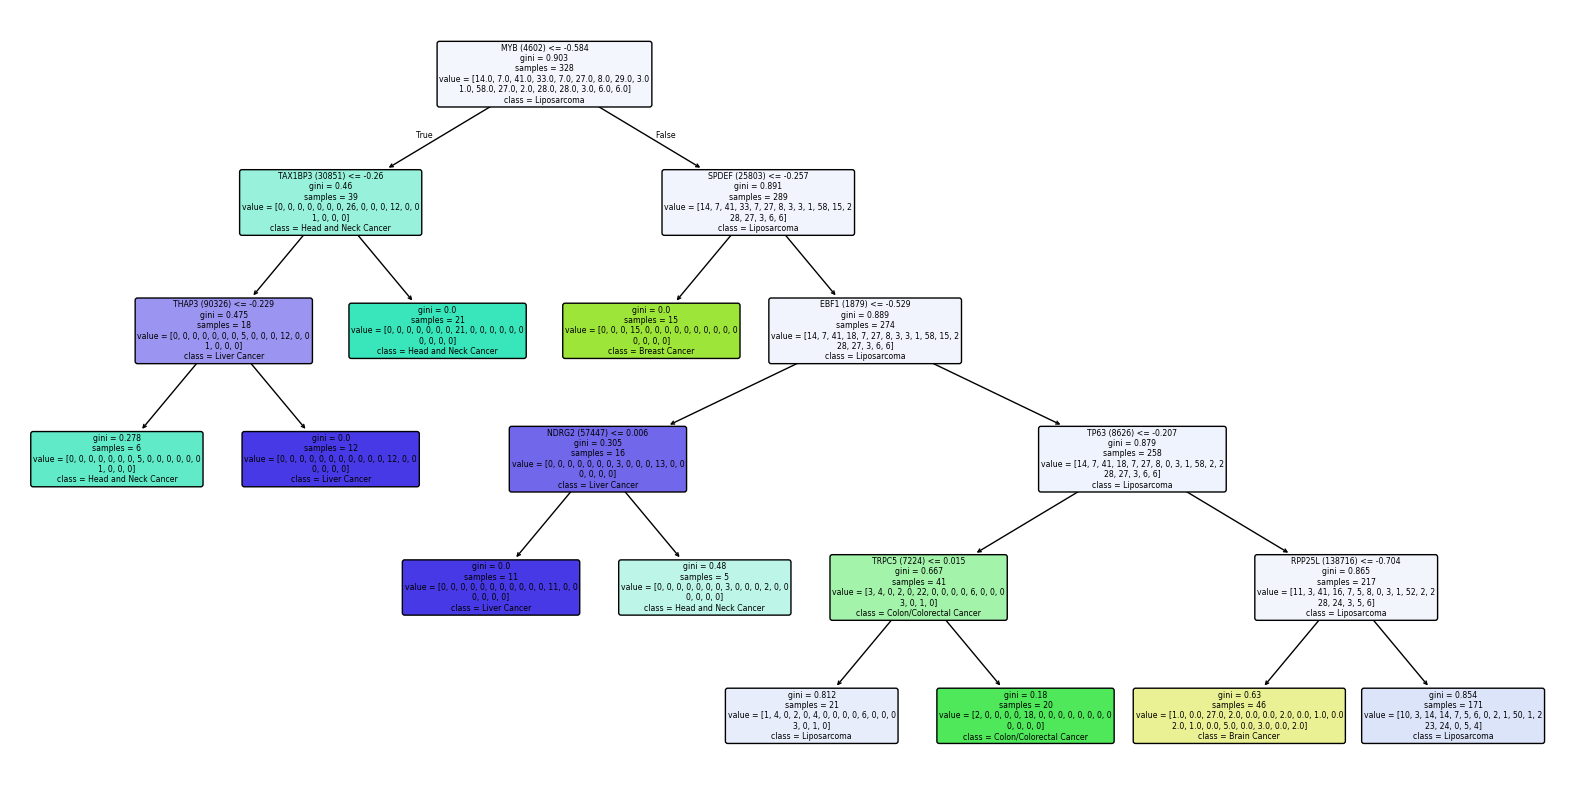

In [36]:
# Select features (numerical only) and target
X = CRISPR_gene_effect_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_effect_master_df['primary_disease']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion= 'gini', 
                                max_depth= 5, 
                                max_features= None, 
                                min_samples_leaf= 5, 
                                min_samples_split= 2
                              )

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Avoid undefined precision/recall issues

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,  # Use the actual feature names from X
    class_names=label_encoder.classes_,  # Pass encoded class names
    filled=True,
    rounded=True,
)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],  # Test different tree depths
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10],   # Minimum number of samples in each leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features considered at each split
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform search
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters Found: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate optimized model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Optimized Parameters: ", accuracy)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters Found:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score:  0.34438228438228435
Test Accuracy with Optimized Parameters:  0.30120481927710846


Accuracy: 0.30120481927710846
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.46      0.73      0.56        15
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.29      0.50      0.36         4
           8       0.00      0.00      0.00         3
           9       0.58      0.70      0.64        10
          12       0.14      0.38      0.20        13
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1

    accuracy               

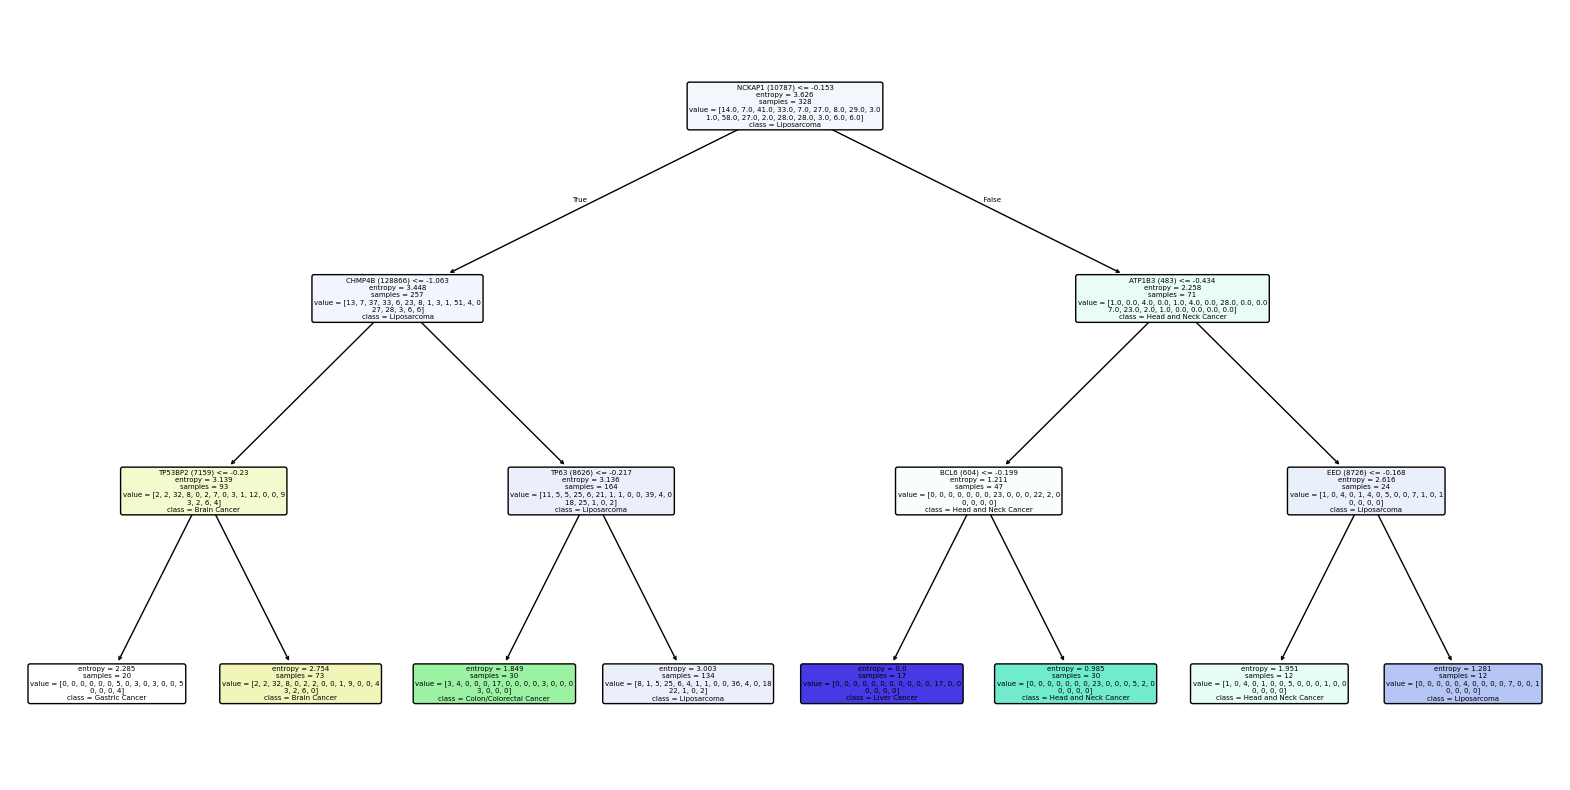

In [47]:
# Select features (numerical only) and target
X = CRISPR_gene_effect_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_effect_master_df['primary_disease']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= None, min_samples_leaf= 10, min_samples_split= 2)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Avoid undefined precision/recall issues

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,  # Use the actual feature names from X
    class_names=label_encoder.classes_,  # Pass encoded class names
    filled=True,
    rounded=True,
)
plt.show()

Accuracy: 0.3253012048192771
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.78      0.47      0.58        15
           3       0.14      0.20      0.17         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.86      0.60      0.71        10
          10       0.00      0.00      0.00         0
          12       0.33      0.31      0.32        13
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.25      0.29      0.27         7
          16       0.58      0.54      0.56        13
          17       0.00      

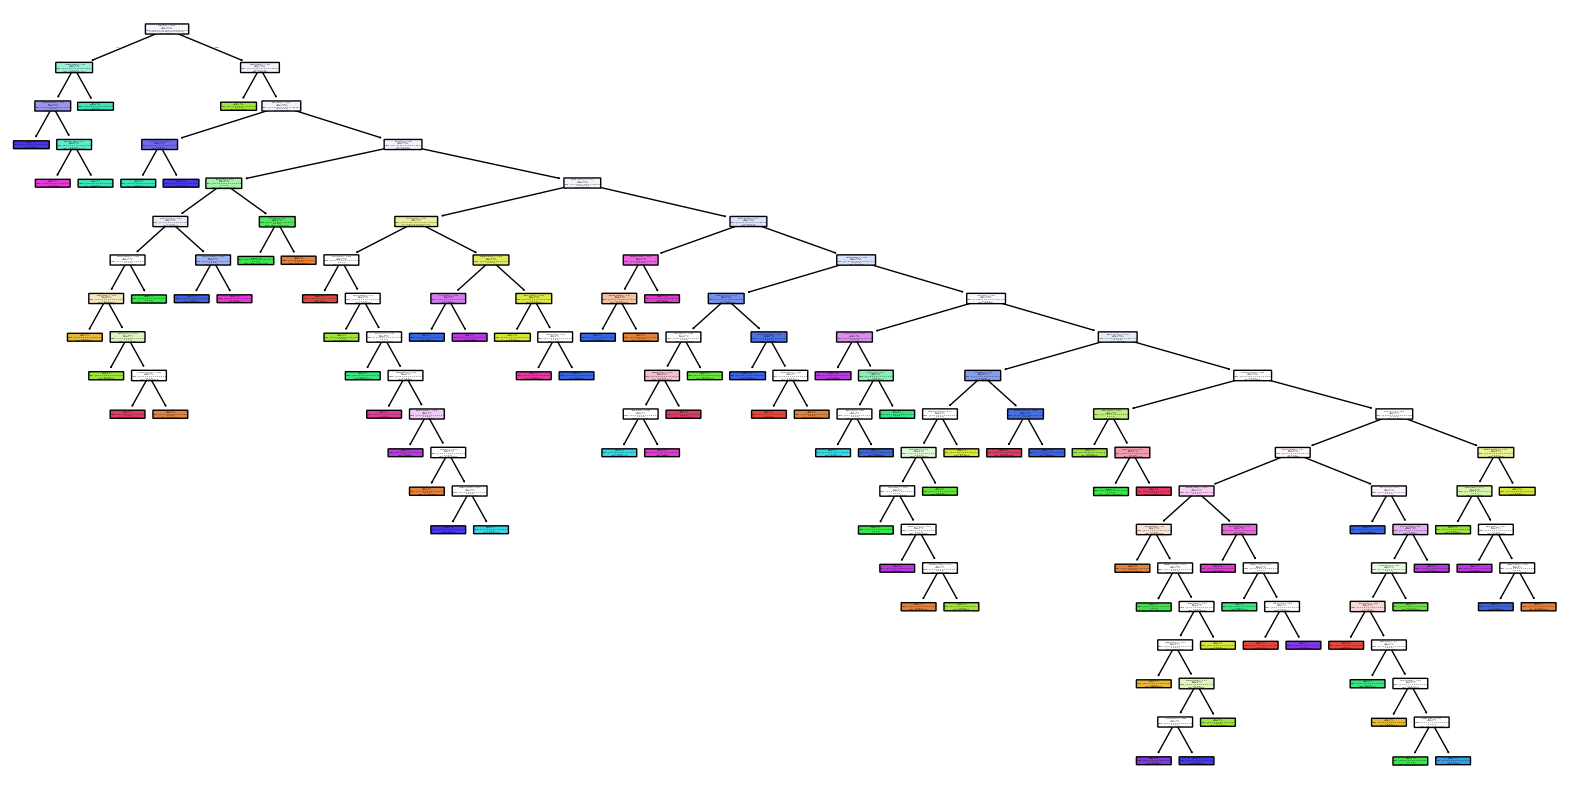

In [39]:
# Select features (numerical only) and target
X = CRISPR_gene_dependency_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_dependency_master_df['primary_disease']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Avoid undefined precision/recall issues

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,  # Use the actual feature names from X
    class_names=label_encoder.classes_,  # Pass encoded class names
    filled=True,
    rounded=True,
)
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],  # Test different tree depths
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10],   # Minimum number of samples in each leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features considered at each split
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform search
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters Found: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate optimized model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Optimized Parameters: ", accuracy)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters Found:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score:  0.34438228438228435
Test Accuracy with Optimized Parameters:  0.30120481927710846


Accuracy: 0.30120481927710846
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.46      0.73      0.56        15
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.29      0.50      0.36         4
           8       0.00      0.00      0.00         3
           9       0.58      0.70      0.64        10
          12       0.14      0.38      0.20        13
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1

    accuracy               

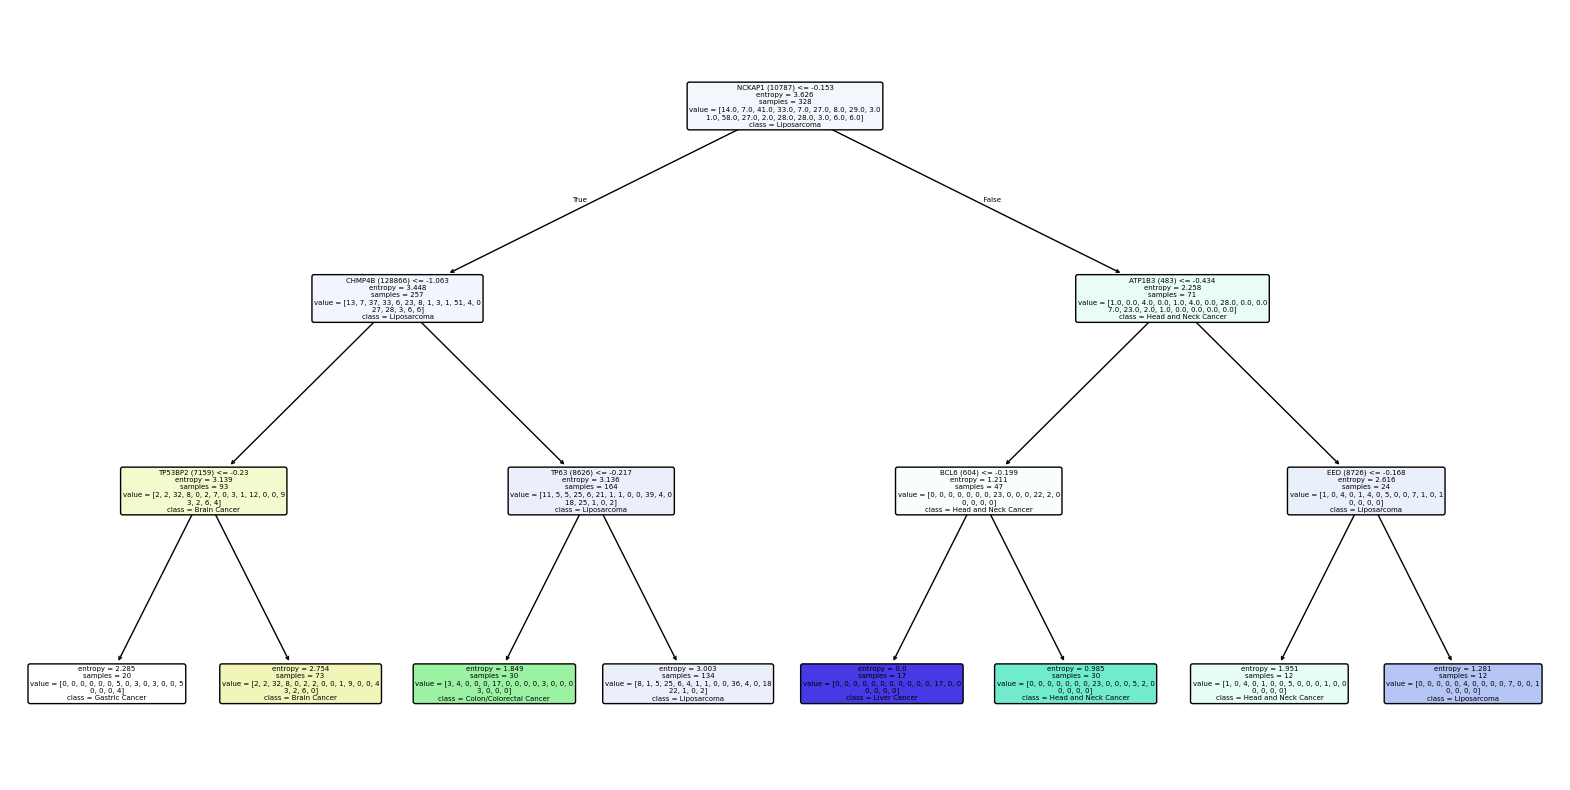

In [48]:
# Select features (numerical only) and target
X = CRISPR_gene_dependency_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_dependency_master_df['primary_disease']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= None, min_samples_leaf= 10, min_samples_split= 2)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Avoid undefined precision/recall issues

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,  # Use the actual feature names from X
    class_names=label_encoder.classes_,  # Pass encoded class names
    filled=True,
    rounded=True,
)
plt.show()

Accuracy: 0.49122807017543857
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         0
           2       0.53      0.62      0.57        13
           3       0.21      0.30      0.25        10
           7       0.00      0.00      0.00         1
           8       0.50      0.33      0.40         3
           9       0.00      0.00      0.00         2
          10       0.83      0.94      0.88        16
          13       0.63      0.41      0.50        29
          14       0.93      0.87      0.90        15
          15       0.00      0.00      0.00         0
          16       0.20      0.08      0.12        12
          17       0.15      0.33      0.21         6
          18       0.50      0.33      0.40         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0

    accuracy               

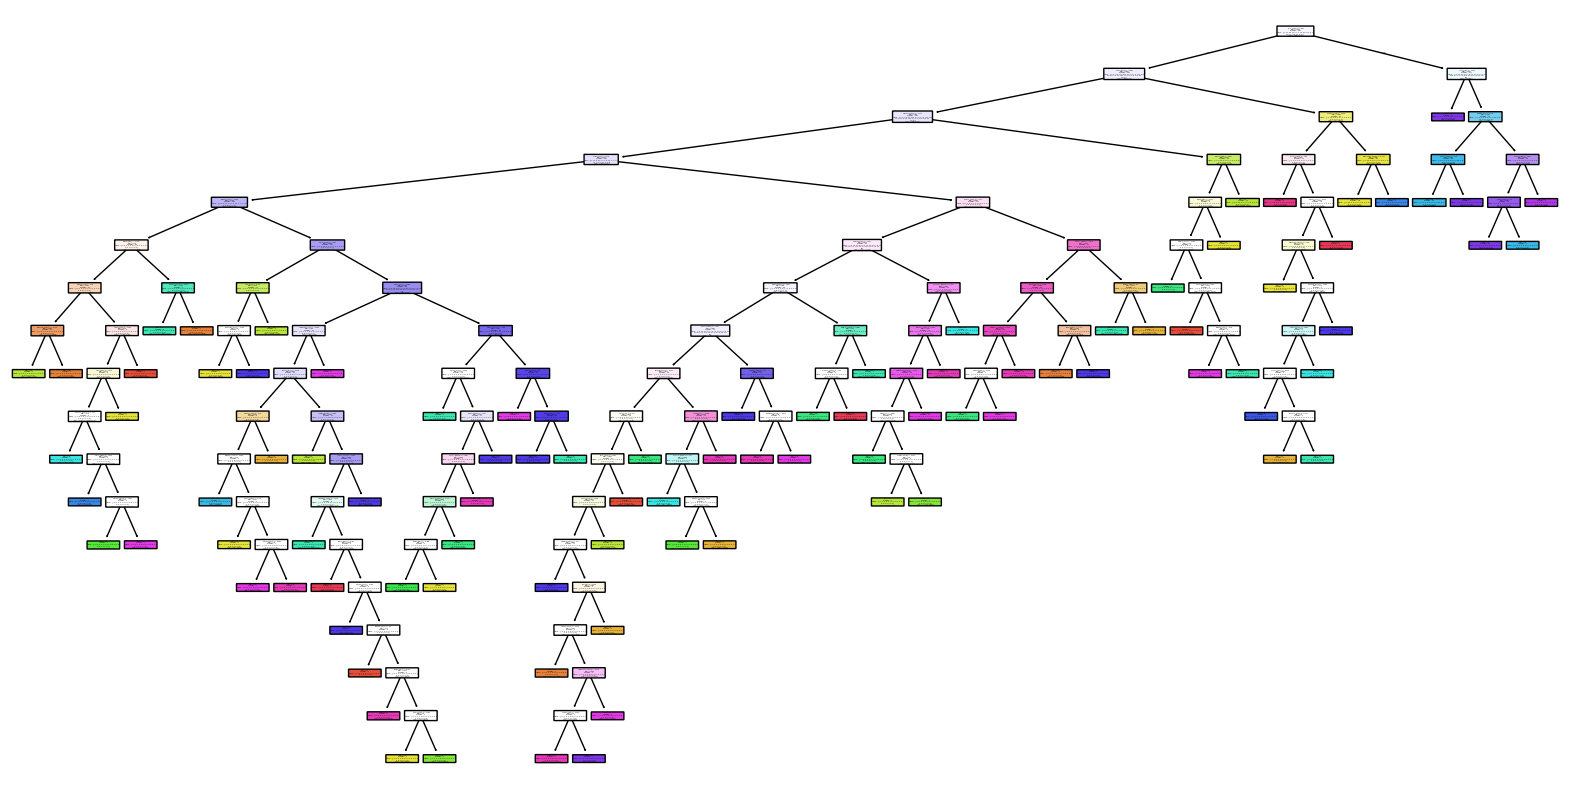

In [43]:
# Select features (numerical only) and target
X = CCLE_expression_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CCLE_expression_master_df['primary_disease']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Avoid undefined precision/recall issues

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,  # Use the actual feature names from X
    class_names=label_encoder.classes_,  # Pass encoded class names
    filled=True,
    rounded=True,
)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],  # Test different tree depths
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 5, 10],   # Minimum number of samples in each leaf
    'max_features': [None, 'sqrt', 'log2'],  # Number of features considered at each split
    'criterion': ['gini', 'entropy']  # Splitting criteria
}

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform search
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters Found: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate optimized model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Optimized Parameters: ", accuracy)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters Found:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score:  0.552675585284281
Test Accuracy with Optimized Parameters:  0.5087719298245614


Accuracy: 0.5263157894736842
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           2       0.67      0.77      0.71        13
           3       0.33      0.60      0.43        10
           7       0.00      0.00      0.00         1
           8       0.40      0.67      0.50         3
           9       0.00      0.00      0.00         2
          10       0.94      0.94      0.94        16
          13       0.42      0.28      0.33        29
          14       0.93      0.93      0.93        15
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        12
          17       0.20      0.67      0.31         6
          18       0.50      0.33      0.40         3
          19       0.00      0.00      0.00         1

    accuracy                           0.53       114
   macro avg       0.31      0.37      0.33       114
weighted avg       0.50     

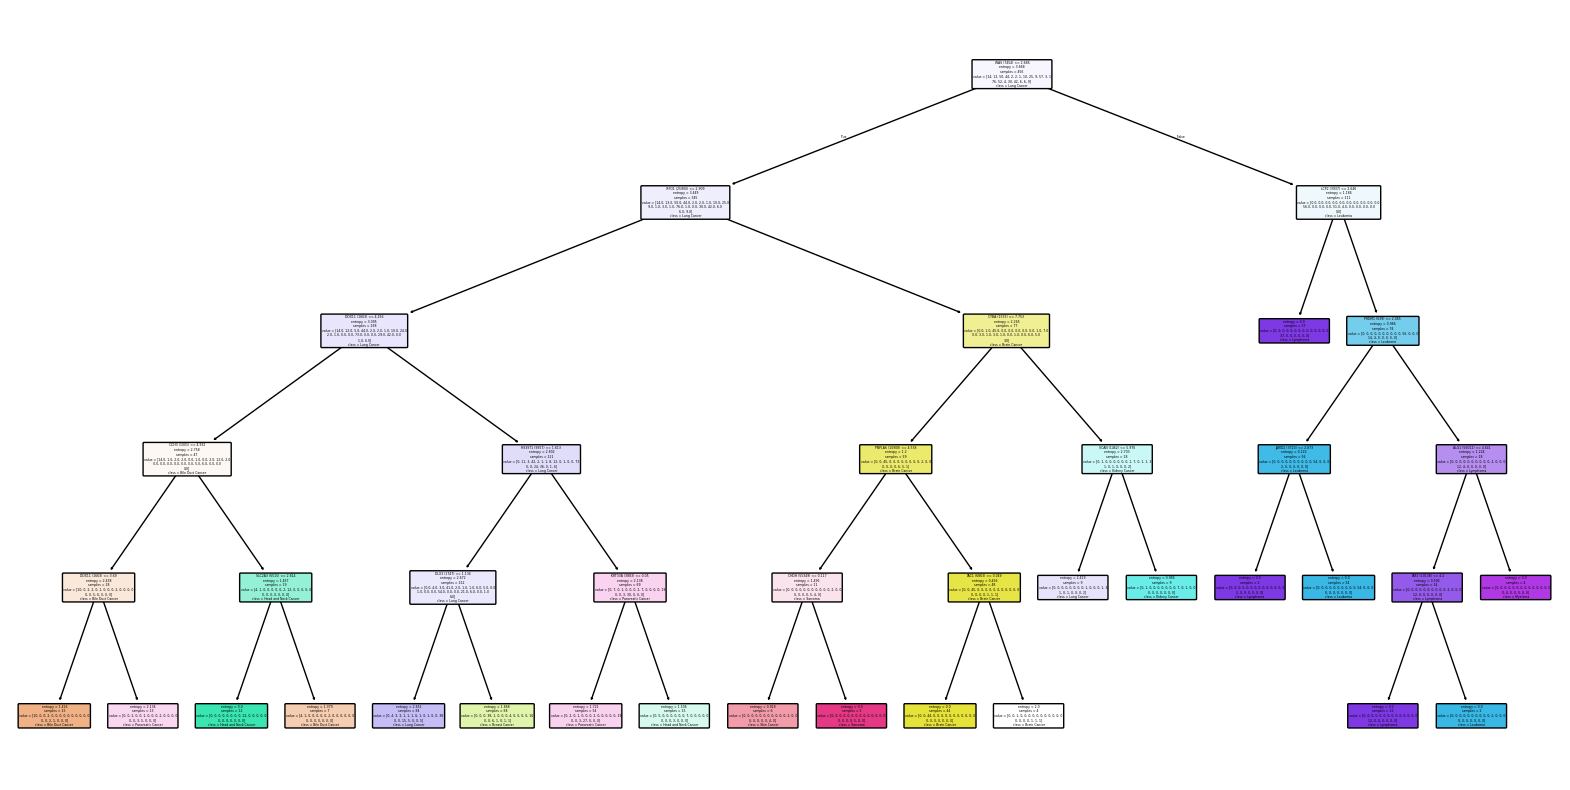

In [49]:
# Select features (numerical only) and target
X = CCLE_expression_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CCLE_expression_master_df['primary_disease']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Fit and transform the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, max_features= None, min_samples_leaf= 1, min_samples_split= 10)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Avoid undefined precision/recall issues

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,  # Use the actual feature names from X
    class_names=label_encoder.classes_,  # Pass encoded class names
    filled=True,
    rounded=True,
)
plt.show()